In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class dot:
    def __init__(self, x:int, y:int):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f"dot({self.x}, {self.y})"
        
        
def get_dots_lists(input_dots):
    x_list = []
    y_list = []
    
    for dot in input_dots:
        x_list.append(dot.x)
        y_list.append(dot.y)
        
    return x_list, y_list
    


In [3]:
enter_dots = [
    dot(1, 1),
    dot(2, 2)
]

move_dot = dot(1.7, 1.2)

In [4]:
class line:
    def __init__(self, k, b):
        self.k = k
        self.b = b
    
    def __init__(self, d1:dot, d2:dot):
        self.k, self.b = self.cal_k_b(d1, d2)
        
    def y(self, x:float):
        return self.k * x + self.b
    
    def len(self, x1:float, x2:float):
        y1 = self.y(x1)
        y2 = self.y(x2)
        
        return np.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        
    def cal_k_b(self, d1:dot, d2:dot):
        k = (d1.y - d2.y) / (d1.x - d2.x)
        b = d2.y - d2.x * k
        return k, b

class final_line(line):
    def __init__(self, d1, d2):
        self.k, self.b = self.cal_k_b(d1, d2)
        self.d1 = d1
        self.d2 = d2
    
    def is_x_inside(self, x:float) ->bool:
        if (((self.d1.x <= x)and(x <= self.d2.x)) or ((self.d2.x <= x)and(x <= self.d1.x))):
            return True
        else:
            return False
    
    def is_y_inside(self, y:float) ->bool:
        if (((self.d1.y <= y)and(y <= self.d2.y)) or ((self.d2.y <= y)and(y <= self.d1.y))):
            return True
        else:
            return False
    
    def is_dot_inside(self, d:dot) -> bool:    
        return (self.is_x_inside(d.x) and self.is_y_inside(d.y))
    
    def len(self):
        return np.sqrt( (self.d1.x - self.d2.x)**2 + (self.d1.y - self.d2.y)**2 )
    
    def get_coo_by_per(self, per:float):
        line_len = self.len()
        
        line_per = line_len * per
        
        x_len = line_per / (np.sqrt(1 + self.k**2))
        
        y_len = x_len * self.k
        
        
        
        #print("k:",self.k)
        
        return dot(self.d1.x + x_len, self.d1.y + y_len)
        
        
    

In [5]:
class bez_1:
    def __init__(self, sd:dot, ed:dot, vd:dot):
        self.sd = sd
        self.ed = ed
        self.vd = vd
        
        self.fline_1 = final_line(sd, vd)
        self.fline_2 = final_line(vd, ed)
        
    def get_bez_xy_step(self, step:int, ax):
        
        x = []
        y = []
        
        for i in np.arange(0, 1.1, step):
        #for i in range(0, 100, 10):
            tem_d1 = self.fline_1.get_coo_by_per(i)
            tem_d2 = self.fline_2.get_coo_by_per(i)
            
            tem_line = final_line(tem_d1, tem_d2)
            
            x.append(tem_line.get_coo_by_per(i).x)
            y.append(tem_line.get_coo_by_per(i).y)
            ax.plot([tem_line.d1.x, tem_line.d2.x], [tem_line.d1.y, tem_line.d2.y], color = "green")
        
        return x, y
        

0.7280109889280517

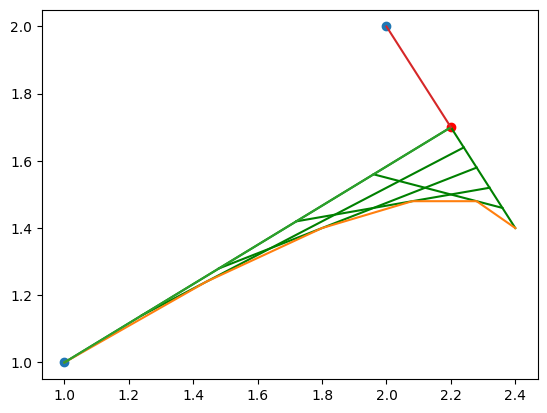

In [6]:
fig, ax = plt.subplots()


dots_x, dots_y = get_dots_lists(enter_dots)

# Start dots
ax.plot(dots_x, dots_y, 'o')

# Moveable dot
#ax.plot(move_dot.x, move_dot.y, 'o', color = "orange")


# Test dots
#test_dot_1 = get_linear_coo_by_percent(enter_dots[0], move_dot, 0.8)
#ax.plot(test_dot_1.x, test_dot_1.y, 'o', color = "purple")

fl1 = final_line(enter_dots[0], move_dot)
fl2 = final_line(move_dot, enter_dots[1])

pers = 0.5

fl_dot1 = fl1.get_coo_by_per(pers)
fl_dot2 = fl2.get_coo_by_per(pers)

flm = final_line(fl_dot1, fl_dot2)
fl_dotm = flm.get_coo_by_per(pers)

#ax.plot(fl_dot1.x, fl_dot1.y, 'o', color = "green")
#ax.plot(fl_dot2.x, fl_dot2.y, 'o', color = "green")
#ax.plot(fl_dotm.x, fl_dotm.y, 'o', color = "green")

#ax.plot([fl1.d1.x, fl1.d2.x], [fl1.d1.y, fl1.d2.y])
#ax.plot([fl2.d1.x, fl2.d2.x], [fl2.d1.y, fl2.d2.y])
#ax.plot([flm.d1.x, flm.d2.x], [flm.d1.y, flm.d2.y])

#bez = bez_1(enter_dots[0], enter_dots[1], move_dot)
#bez_x, bez_y = bez.get_bez_xy_step(0.10)
#ax.plot(bez_x, bez_y)



move_dot2 = dot(move_dot.x + 0.5, move_dot.y + 0.5)
bez = bez_1(enter_dots[0], enter_dots[1], move_dot2)
ax.plot(move_dot2.x, move_dot2.y, 'o', color = "red")
bez_x, bez_y = bez.get_bez_xy_step(0.2,ax)
ax.plot(bez_x, bez_y)


ax.plot([bez.fline_1.d1.x, bez.fline_1.d2.x], [bez.fline_1.d1.y, bez.fline_1.d2.y])
ax.plot([bez.fline_2.d1.x, bez.fline_2.d2.x], [bez.fline_2.d1.y, bez.fline_2.d2.y])


str(fl1.d1), str(fl1.d2)
fl1.len()

In [7]:
print(np.sqrt(0.019999999999999993**2 + 0.06999999999999999**2))

0.07280109889280517


!!!!!!!!!!!


In [20]:
xy = [
    (0, 0), (8e-06, 0.001184), (6.4e-05, 0.004672), (0.000216, 0.010368), (0.000512, 0.018176), (0.001, 0.028), (0.001728, 0.039744), (0.002744, 0.053312), (0.004096, 0.068608), (0.005832, 0.085536), (0.008, 0.104), (0.010648, 0.123904), (0.013824, 0.145152), (0.017576, 0.167648), (0.021952, 0.191296), (0.027, 0.216), (0.032768, 0.241664), (0.039304, 0.268192), (0.046656, 0.295488), (0.054872, 0.323456), (0.064, 0.352), (0.074088, 0.381024), (0.085184, 0.410432), (0.097336, 0.440128), (0.110592, 0.470016), (0.125, 0.5), (0.140608, 0.529984), (0.157464, 0.559872), (0.175616, 0.589568), (0.195112, 0.618976), (0.216, 0.648), (0.238328, 0.676544), (0.262144, 0.704512), (0.287496, 0.731808), (0.314432, 0.758336), (0.343, 0.784), (0.373248, 0.808704), (0.405224, 0.832352), (0.438976, 0.854848), (0.474552, 0.876096), (0.512, 0.896), (0.551368, 0.914464), (0.592704, 0.931392), (0.636056, 0.946688), (0.681472, 0.960256), (0.729, 0.972), (0.778688, 0.981824), (0.830584, 0.989632), (0.884736, 0.995328), (0.941192, 0.998816), (1, 1)
]

x = []
y = []
for i in xy: 
    x.append(i[0])
    y.append(i[1])    

In [39]:
n = 3
vert = [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)]


def get_single_point(t:float):
    x = 0;
    y = 0;
    z = 0;
    
    for i in range(1, n+1):
        x += np.math.factorial(n) / np.math.factorial(i) / np.math.factorial(n-i) * (1 - t)**(n-i) * t**i * vert[i-1][0]
        y += np.math.factorial(n) / np.math.factorial(i) / np.math.factorial(n-i) * (1 - t)**(n-i) * t**i * vert[i-1][1]
    
    return (x,y)

In [41]:
v = []
for i in range(0, 50):
    v.append(get_single_point(1/50*i))

In [42]:
x = []
y = []
for i in v: 
    x.append(i[0])
    y.append(i[1]) 

In [50]:
xy1 = [
    (0, 0), (3.184e-05, 0.00233632), (0.00025344, 0.00909312), (0.00085104, 0.0198979), (0.00200704, 0.0343859), (0.0039, 0.0522), (0.00670464, 0.0729907), (0.0105918, 0.0964163), (0.0157286, 0.122143), (0.0222782, 0.149844), (0.0304, 0.1792), (0.0402494, 0.209901), (0.0519782, 0.241644), (0.0657342, 0.274132), (0.0816614, 0.307077), (0.0999, 0.3402), (0.120586, 0.373228), (0.143853, 0.405895), (0.169828, 0.437944), (0.198637, 0.469127), (0.2304, 0.4992), (0.265235, 0.52793), (0.303255, 0.55509), (0.344569, 0.580461), (0.389284, 0.603832), (0.4375, 0.625), (0.489316, 0.643768), (0.544825, 0.659949), (0.604119, 0.673362), (0.667283, 0.683834), (0.7344, 0.6912), (0.805549, 0.695303), (0.880804, 0.695992), (0.960236, 0.693127), (1.04391, 0.686572), (1.1319, 0.6762), (1.22425, 0.661893), (1.32103, 0.64354), (1.42228, 0.621036), (1.52806, 0.594285), (1.6384, 0.5632), (1.75335, 0.5277), (1.87294, 0.487711), (1.99722, 0.443168), (2.12619, 0.394015), (2.2599, 0.3402), (2.39836, 0.281682), (2.54159, 0.218426), (2.6896, 0.150405), (2.8424, 0.0776005), (3, 0)
]

xy2 = [
    (0, 0), (8e-06, 0.001184), (6.4e-05, 0.004672), (0.000216, 0.010368), (0.000512, 0.018176), (0.001, 0.028), (0.001728, 0.039744), (0.002744, 0.053312), (0.004096, 0.068608), (0.005832, 0.085536), (0.008, 0.104), (0.010648, 0.123904), (0.013824, 0.145152), (0.017576, 0.167648), (0.021952, 0.191296), (0.027, 0.216), (0.032768, 0.241664), (0.039304, 0.268192), (0.046656, 0.295488), (0.054872, 0.323456), (0.064, 0.352), (0.074088, 0.381024), (0.085184, 0.410432), (0.097336, 0.440128), (0.110592, 0.470016), (0.125, 0.5), (0.140608, 0.529984), (0.157464, 0.559872), (0.175616, 0.589568), (0.195112, 0.618976), (0.216, 0.648), (0.238328, 0.676544), (0.262144, 0.704512), (0.287496, 0.731808), (0.314432, 0.758336), (0.343, 0.784), (0.373248, 0.808704), (0.405224, 0.832352), (0.438976, 0.854848), (0.474552, 0.876096), (0.512, 0.896), (0.551368, 0.914464), (0.592704, 0.931392), (0.636056, 0.946688), (0.681472, 0.960256), (0.729, 0.972), (0.778688, 0.981824), (0.830584, 0.989632), (0.884736, 0.995328), (0.941192, 0.998816), (1, 1)
]

x1 = []
y1 = []

x2 = []
y2 = []
for i in xy1: 
    x1.append(i[0])
    y1.append(i[1])    
    
for i in xy2: 
    x2.append(i[0])
    y2.append(i[1])    

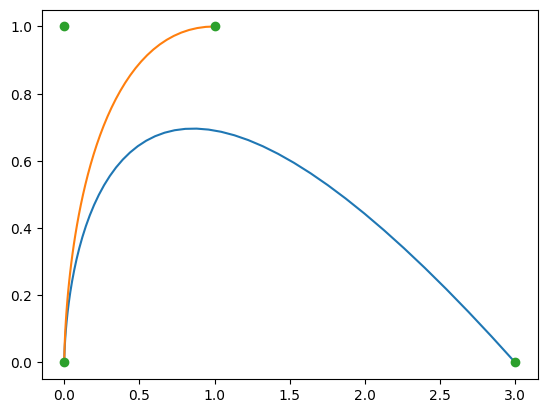

In [52]:
fig, ax = plt.subplots()

lx = [
    0.0,
    0.0,
    1.0, 
    3.0,
]
ly = [
   0.0,
    1.0, 
    1.0,
    0.0,
]

tangex = [
    0
]
tangey = [
    0.25
]

# Start dots
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.plot(lx, ly, 'o')